In [2]:
from math import *
import cmath
import numpy as np
from scipy.optimize import fsolve
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt

print("Sucess!")

Sucess!


In [3]:
# ---------- Determine Equivalent Circuit Parameters ----------

V = 4.24 + 0j
I = cmath.rect(6.61, radians(-59.5))
R1 = 0.17 #[Ohm]
R2 = 0.1883 #[Ohm] <-- From Mason
L1 = L2 = 0.7549E-3 #[H] <-- Mason
Lm = 7.7686E-3 #[H] <-- Mason

omega = 60*2*pi


P = V*I
P_R1 = I * np.conj(I) * R1

P_R2 = P.real - P_R1.real

print("I_exp = \t{:.4f} \t[A]".format(I))
print("Power = \t{:.4f} \t[W]".format(P.real))
print("P_R1 =  \t{:.4f} \t\t[W]".format(P_R1.real))
print("P_R2 =  \t{:.4f} \t\t[W]".format(P_R2.real))

z_tot = (R1 + omega*L1*1j) + (1/(omega*Lm*1j) + 1/(R2 + omega*L2*1j))
print("\nZ_tot = \t{:.4f} \t[Ohm]".format(z_tot))
I_s = V / z_tot
print("I_s = \t\t{:.4f} \t[A]".format(I_s))

P = I_s * np.conj(I_s) * z_tot
print("Re(P) = \t{:.4f} \t\t[W]".format(P.real))




I_exp = 	3.3548-5.6954j 	[A]
Power = 	14.2245 	[W]
P_R1 =  	7.4277 		[W]
P_R2 =  	6.7968 		[W]

Z_tot = 	1.7870-2.5008j 	[Ohm]
I_s = 		0.8020+1.1224j 	[A]
Re(P) = 	3.4006 		[W]


X1 = 0.2846
Xm = 2.9353
Rth = 0.1550
Xth = 0.2595
Vth = 17.7763


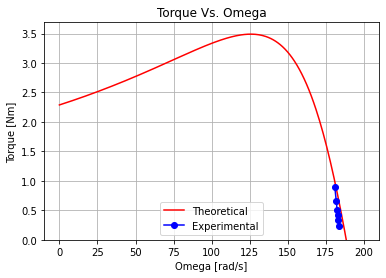

In [4]:
# --- Task 3 - Torque Vs. Rotor speed ---
#

v = 19.5        #[V]
f = 60          #[Hz]
omegaf = 2*pi*f  #[rad/s]
R1 = 0.17       #[Ohm]
R2 = 0.1883     #[Ohm]
L1 = 0.755E-3   #[H]
Lm = 7.786E-3   #[H]

X1 = X2 = omegaf*L1
Xm = omegaf*Lm
print("X1 = %0.4f" % X1)
print("Xm = %0.4f" % Xm)

Rth = R1 * (Xm / (X1 + Xm))
Xth = X1 * (Xm / (X1 + Xm))
print("Rth = %0.4f" % Rth)
print("Xth = %0.4f" % Xth)

Vth = v * (Xm / (X1 + Xm))
print("Vth = %0.4f" % Vth)

ws = 1800 * (pi/30) # 120*f/P

omega = np.linspace(0, 200, int(256))
torque = np.zeros(len(omega))

for i, w in enumerate(omega):
  s = (ws - w)/ws
  torque[i] = ((3*Vth**2) / ws) * ((R2/s) / (((Rth + R2/s)**2) + (Xth + X2)**2))

plt.plot(omega, torque, 'r-', label="Theoretical")

# Now do the experiental measurements
speeds = np.array([183.678, 183.260, 182.945, 182.527, 181.898, 180.956])
torques = np.array([0.23, 0.33, 0.42, 0.5, 0.66, 0.9])
plt.plot(speeds, torques, 'bo-', label="Experimental")

plt.title("Torque Vs. Omega")
plt.xlabel("Omega [rad/s]")
plt.ylabel("Torque [Nm]")
plt.ylim(0, (max(torque) + 0.2))

# Uncomment these lines to create the zoomed-in plot
# plt.xlim([min(speeds) - 0.5, max(speeds) + 0.5])
# plt.ylim([0, 1])

plt.grid(True)
plt.legend(loc='lower center')
plt.show()



[0.48450516 0.56733479 0.63279625 0.6969537  0.8069505  0.94891095]
[0.27731465 0.32556815 0.36325123 0.40673664 0.47562421 0.55339155]


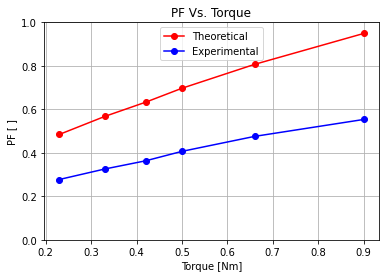

In [8]:
# --- Task 3 - Power Factor Vs. Torque ---
#

torques = np.array([0.23, 0.33, 0.42, 0.5, 0.66, 0.9])
n = len(torques)

Pelec = np.array([100.2, 119.5, 136, 153.4, 185.7, 234])
Vrms = np.array([19.51, 19.52, 19.51, 19.52, 19.51, 19.53])
Irms = np.array([6.12, 6.23, 6.36, 6.51, 6.81, 7.29])

Zeq = 0.3096 + 0.5714*1j

# Create current as an array of complex numbers
r = np.array([6.12, 6.23, 6.36, 6.51, 6.81, 7.29])
theta = np.array([-1.289798317, -1.239183769, -1.199041196, -1.151917306, -1.075122819, -0.9843656981])
currents = np.zeros(n, dtype=complex) # Initialize the current array
# Loop over the array and fill in the complex current values
for i in range(n):
  currents[i] = cmath.rect(r[i], theta[i])
#print(currents)

# Theoretical voltage is constant at 19.5
voltages = np.ones(n) * 19.5

P = np.zeros(n)
Q = np.zeros(n)
S = np.zeros(n)
PF_theoretical = np.zeros(n)
PF_experimental = np.zeros(n)


for i in range(n):

  PF_theoretical[i] = Pelec[i] / (sqrt(3) * Vrms[i] * Irms[i])
  
  P[i] = (currents[i] * voltages[i]).real
  Q[i] = (currents[i] * voltages[i]).imag
  S[i] = sqrt(P[i]**2 + Q[i]**2)
  PF_experimental[i] = P[i]/S[i]

print(PF_theoretical)
print(PF_experimental)

plt.plot(torques, PF_theoretical, 'ro-', label="Theoretical")
plt.plot(torques, PF_experimental, 'bo-', label="Experimental")

plt.title("PF Vs. Torque")
plt.xlabel("Torque [Nm]")
plt.ylabel("PF [ ]")
plt.ylim([0, 1])
#plt.xlim([min(torque), max(torque)])
plt.grid(True)
plt.legend(loc='upper center')
plt.show()


In [ ]:
# --- Task 3 - Bonus Efficiency ---
#

Torques = np.array([0.23, 0.33, 0.42, 0.5, 0.66, 0.9])
Volts = np.array([19.51, 19.52, 19.51, 19.52, 19.51, 19.53])
n = len(Torques)

omegas = np.array([183.678, 183.260, 182.945, 182.527, 181.898, 180.956])
# Create current as an array of complex numbers
r = np.array([6.12, 6.23, 6.36, 6.51, 6.81, 7.29])
theta = np.array([-1.289798317, -1.239183769, -1.199041196, -1.151917306, -1.075122819, -0.9843656981])

Pmech = [42.246, 60.476, 76.837, 91.263, 120.053, 162.860]
Pelec = [100.2, 119.5, 136, 153.4, 185.7, 234]

n_exp = np.zeros(n)
n_theo = np.zeros(n)

for i in range(n):
  n_exp[i] = Pmech[i]/Pelec[i]
  n_theo[i] = (Torques[i]*omegas[i]) / (3*Volts[i]*r[i]*cos(theta[i]))

plt.plot(Torques, n_theo, 'ro-', label="Theoretical")
plt.plot(Torques, n_exp, 'bo-', label="Experimental")

plt.title("Efficiency Vs. Torque")
plt.xlabel("Torque [Nm]")
plt.ylabel("η [ ]")
#plt.ylim([10, 150])
#plt.xlim([min(torque), max(torque)])
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [ ]:
# # --- Task 4 - Torque Vs. Slip ---

volts = np.array([19.53, 8.92]) #[V]
colours = ['b-', 'r-']
f = 60          #[Hz]
omegaf = 2*pi*f  #[rad/s]
R1 = 0.17       #[Ohm]
R2 = 0.1883     #[Ohm]
L1 = 0.755E-3   #[H]
Lm = 7.786E-3   #[H]

X1 = X2 = omegaf*L1
Xm = omegaf*Lm
print("X1 = %0.4f" % X1)
print("Xm = %0.4f" % Xm)

Rth = R1 * (Xm / (X1 + Xm))
Xth = X1 * (Xm / (X1 + Xm))
print("Rth = %0.4f" % Rth)
print("Xth = %0.4f" % Xth)

ws = 1800 * (pi/30) # 120*f/P

slips = np.linspace(0.1, 1, int(256))
torque = np.zeros(len(slips))

for outIndex in range(len(volts)):

  Vth = volts[outIndex] * (Xm / (X1 + Xm))
  print("V = %0.4f --> Vth = %0.4f" % (volts[outIndex], Vth))

  for i, s in enumerate(slips):

      torque[i] = ((3*Vth**2) / ws) * ((R2/s) / (((Rth + R2/s)**2) + (Xth + X2)**2))

  plt.plot(slips, torque, colours[outIndex], label="V = {:.0f}".format(volts[outIndex]))

# Now do the experiental measurements
experimentalSlip = np.array([0.520, 0.525, 0.534, 0.564, 0.651])
experimentalTorque = np.array([0.9, 0.88, 0.89, 0.88, 0.7])
plt.plot(experimentalSlip, experimentalTorque, 'go-', label="Experimental")

plt.title("Torque vs Slip for Induction Motor")
plt.xlabel("Slip [ ]")
plt.ylabel("Torque [Nm]")
#plt.ylim([10, 150])
#plt.xlim([min(torque), max(torque)])
plt.grid(True)
plt.legend(loc='upper center')
plt.show()